<a href="https://colab.research.google.com/github/Aman7Rathore/Zomato-restaurant-clustering-and-sentiment-analysis/blob/main/Zomato_restaurant_clustering_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** : Zomato restaurant clustering and sentiment analysis

**Project Type** - Unsupervised

Contribution - Individual

Team Member - Aman Singh Rathore


#**Project Summary** 
We are provided with two datasets, One is the metadata dataset and the other one is the Reviews dataset. 
The Project focuses on Customers and companies, we have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is visualized as it becomes easy to analyze data in an instant. The Analysis also solve some of the business cases that can directly help the customers find the Best restaurant in their locality and for the company to grow up and work in the fields they are currently lagging in.

At first, we performed Data cleaning by creating a data frame and removing unnecessary columns with null values, dropping the duplicate rows in this dataset, and started getting basic insight from the cleaned dataset.

We have performed some text preprocessing on some columns to make them efficient for us to implement our clustering models, And also performed visualization to get basic insights on the features. 

We went with feature conversion in which the object datatype features are converted to numeric features in our dataset.

After feature selection, we tend to split the data into clusters and started implementing basic Machine Learning Models for clustering


#**Github Link** : https://github.com/Aman7Rathore/Zomato-restaurant-clustering-and-sentiment-_analysis

#**Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India. The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

#**Attribute Information :**

#**Zomato Restaurant names and Metadata**

Use this dataset for clustering part

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

#**Zomato Restaurant reviews**

Merge this dataset with Names and Matadata and then use for sentiment analysis part

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Capstone Project 4/Zomato Restaurant names and Metadata.csv')

review = pd.read_csv('/content/drive/MyDrive/Capstone Project 4/Zomato Restaurant reviews.csv')

In [4]:
data.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [6]:
#Cost Feature has comma between numerics making it a string datatype so we will convert it back to int datatype
data['Cost'] = data['Cost'].str.replace(',','').astype(int)

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop(['Links','Collections','Timings'],axis=1,inplace=True)

In [9]:
data= data.dropna()

In [10]:
data.Cuisines

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [11]:
#Converting Cuisines to a list and then to a dictionary
cuisine_list = data.Cuisines.str.split(', ')
cuisines = {}
for i in cuisine_list:
  for j in i:
    if j in cuisines:
      cuisines[j]=cuisines[j]+1
    else:
      cuisines[j]=1

In [12]:
cuisines

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 9,
 'North Indian': 61,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Andhra': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

#**K Means Clustering**

In [13]:
df = data.copy()

In [14]:
df.head(3)

Name  Cost                                           Cuisines
0  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...
1         Paradise   800                     Biryani, North Indian, Chinese
2         Flechazo  1300       Asian, Mediterranean, North Indian, Desserts

In [15]:
#splitting cuisines
df['Cuisines'] = df['Cuisines'].str.replace(' ','')
df['Cuisines'] = df['Cuisines'].str.split(',')

In [16]:
#importing library
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

In [17]:
#joining sparse matrix together
df=df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('Cuisines')),index=df.index, columns=mlb.classes_))

In [18]:
df.head()

Name  Cost  American  Andhra  Arabian  Asian  \
0                 Beyond Flavours   800         0       0        0      0   
1                        Paradise   800         0       0        0      0   
2                        Flechazo  1300         0       0        0      1   
3  Shah Ghouse Hotel & Restaurant   800         0       0        0      0   
4      Over The Moon Brew Company  1200         0       0        0      1   

   BBQ  Bakery  Beverages  Biryani  ...  NorthIndian  Pizza  Salad  Seafood  \
0    0       0          0        0  ...            1      0      0        0   
1    0       0          0        1  ...            1      0      0        0   
2    0       0          0        0  ...            1      0      0        0   
3    0       0          1        1  ...            1      0      0        1   
4    0       0          0        0  ...            1      0      0        0   

   SouthIndian  Spanish  StreetFood  Sushi  Thai  Wraps  
0            1        0           0      0     0      0  
1            0        0           0      0     0      0  
2            0        0           0      0     0      0  
3            0        0           0      0     0      0  
4            0        0           0      0     0      0  

[5 rows x 46 columns]

In [19]:
#dropping name column
x=df.drop('Name',axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fdd17a040>,
                 estimator=KMeans(n_clusters=9), k=(2, 10), locate_elbow=False,
                 timings=False)

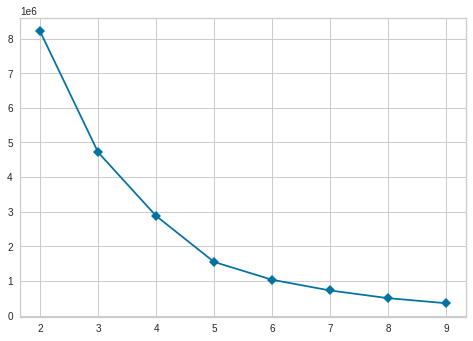

In [20]:
#elbow method for finding optimal value of k
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False, locate_elbow=False)

visualizer.fit(x) 
# Fit the data to the visualizer
     

In [21]:
#fitting k means clustering model
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [22]:
y_kmeans.shape

(105,)

In [23]:
#creating new variable
df['km_labels'] = y_kmeans

Text(0.5, 1.0, 'visualizing clusters using k means clustering')

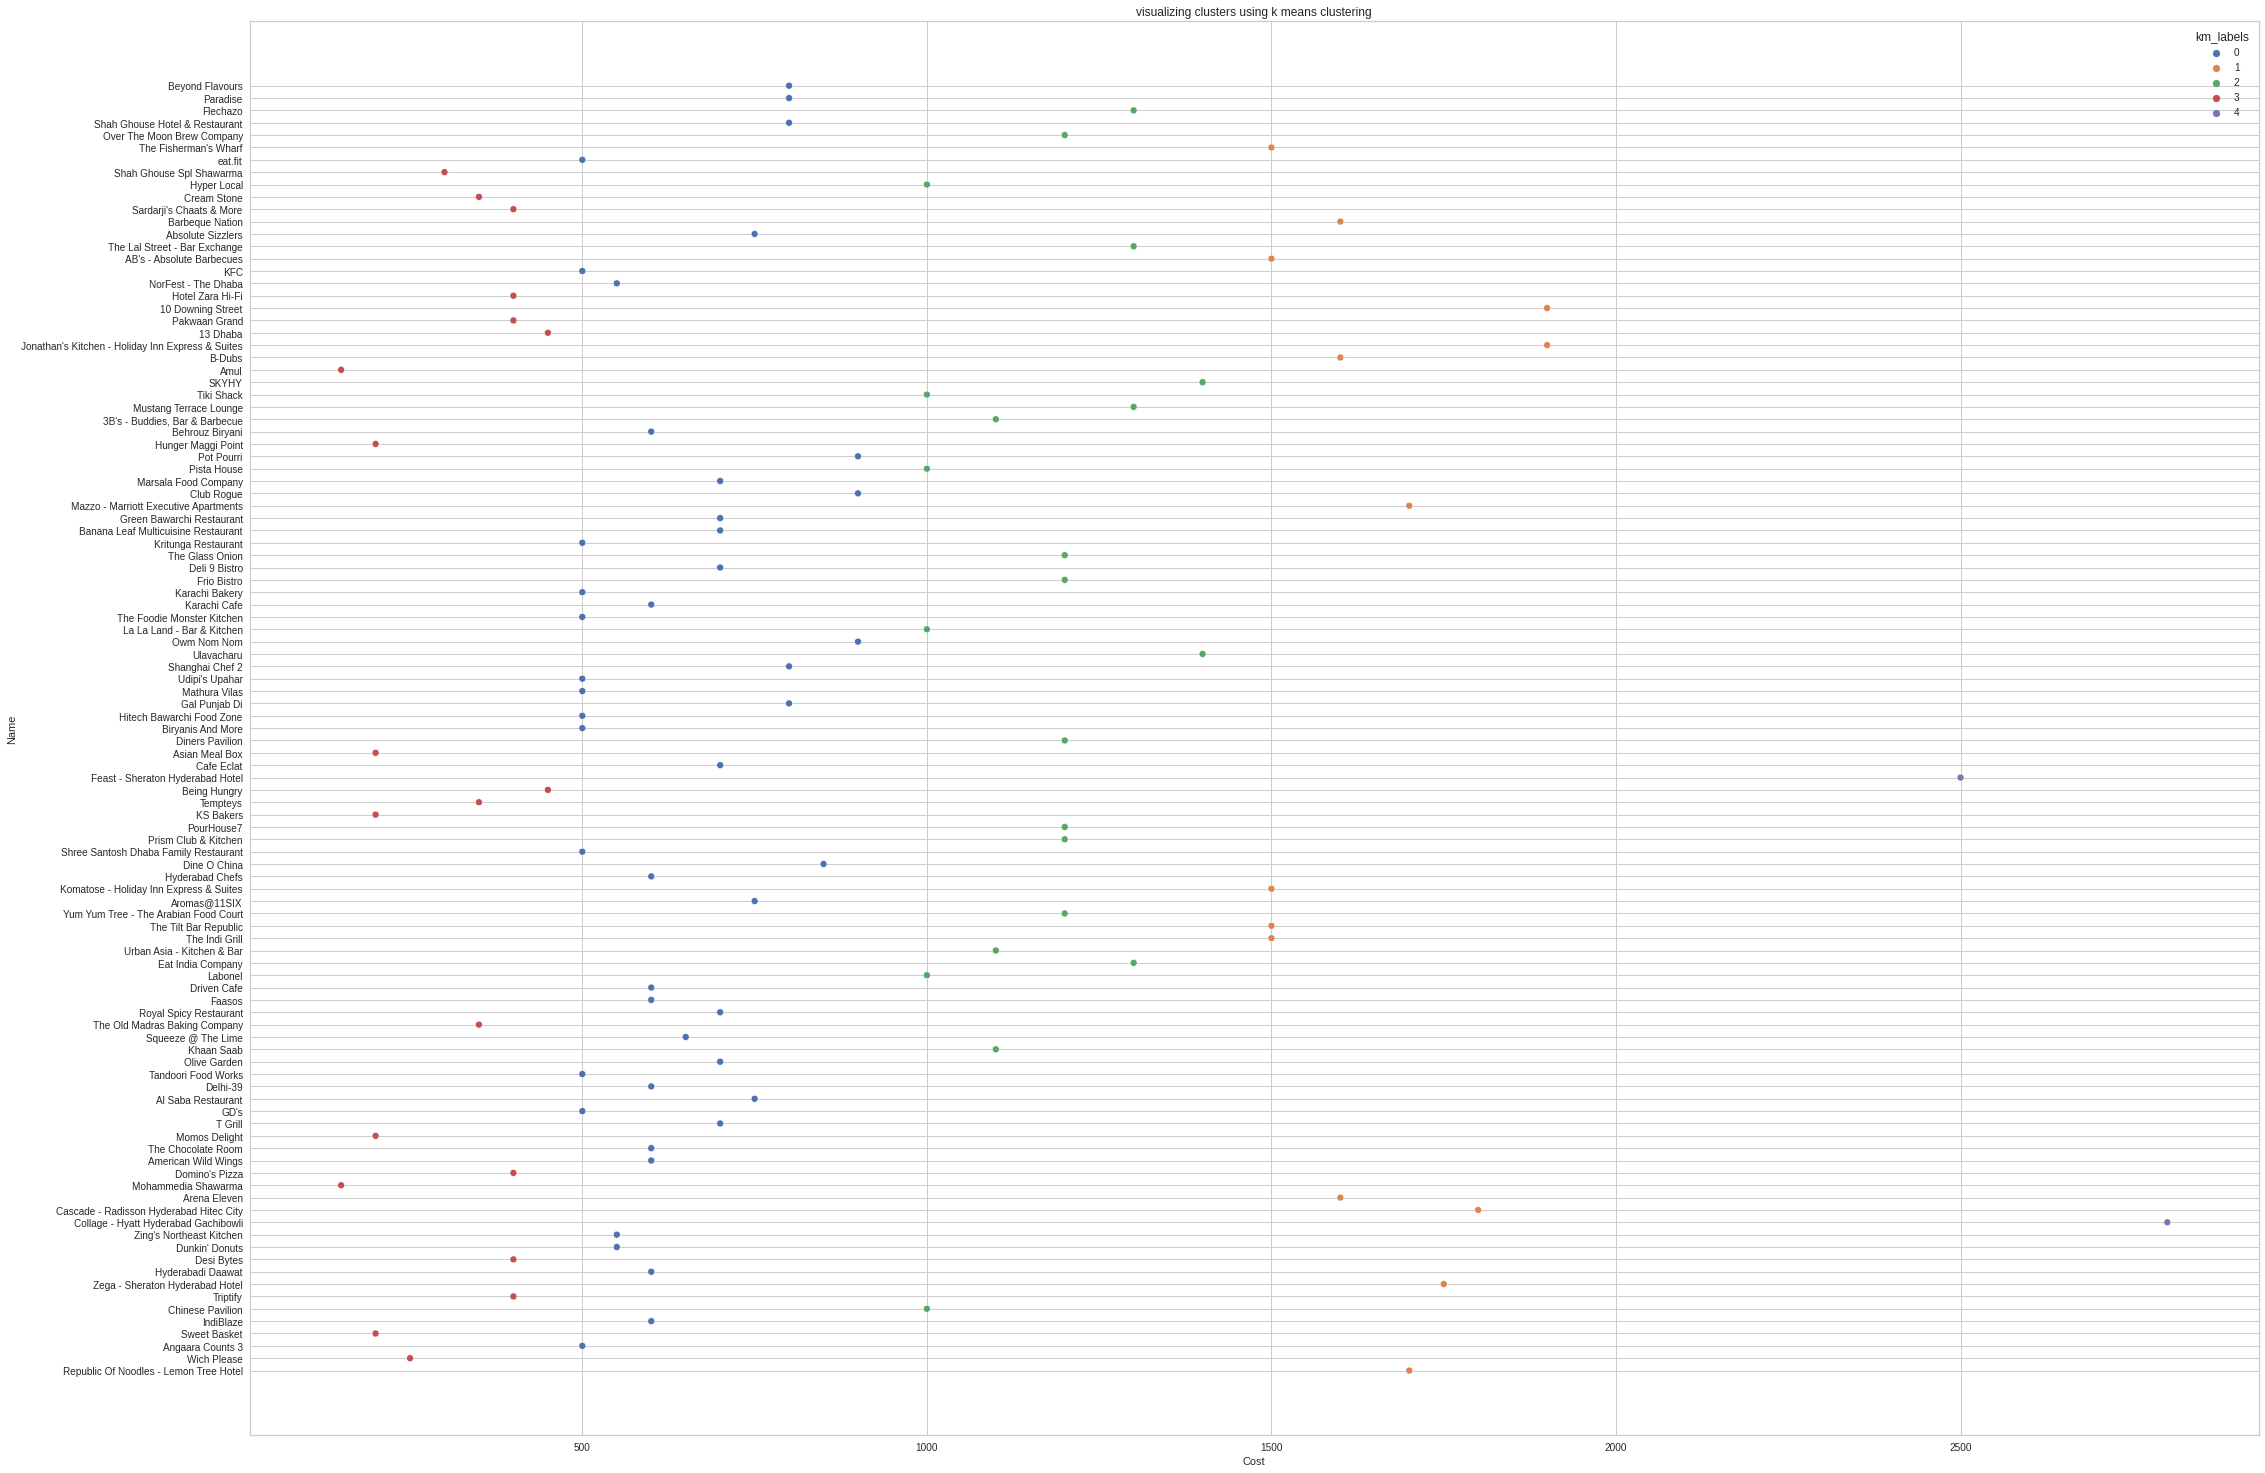

In [24]:
plt.figure(figsize = (36,26))
sns.scatterplot(x='Cost',y='Name',data=df,hue='km_labels', palette = 'deep')
plt.title('visualizing clusters using k means clustering')

After applying k means on the dataset we can see that from the scatter that restaurants are divided into 5 clusters using k means clustering Based on the cuisines

In [25]:
#printing k means cluster centres
kmeans.cluster_centers_

array([[ 6.42553191e+02,  8.51063830e-02,  1.06382979e-01,
         2.12765957e-02,  4.25531915e-02, -1.38777878e-17,
         4.25531915e-02,  6.38297872e-02,  3.19148936e-01,
         1.06382979e-01,  1.27659574e-01,  5.10638298e-01,
         1.27659574e-01,  1.48936170e-01,  2.12765957e-02,
         2.12765957e-01, -1.38777878e-17, -6.93889390e-18,
         2.12765957e-02,  6.38297872e-02, -1.38777878e-17,
         2.12765957e-02,  2.12765957e-02, -1.38777878e-17,
        -6.93889390e-18,  4.25531915e-02, -6.93889390e-18,
        -6.93889390e-18, -1.38777878e-17, -6.93889390e-18,
        -6.93889390e-18, -1.38777878e-17,  4.25531915e-02,
         6.38297872e-02,  2.12765957e-02,  5.95744681e-01,
        -6.93889390e-18,  6.38297872e-02,  4.25531915e-02,
         1.48936170e-01, -6.93889390e-18, -1.38777878e-17,
        -2.77555756e-17,  2.12765957e-02,  2.12765957e-02],
       [ 1.64642857e+03,  7.14285714e-02, -6.93889390e-18,
         6.93889390e-18,  4.28571429e-01,  1.42857143e-

In [26]:
#creating dataframe for each clusters
cluster_1 = df[df['km_labels'] == 0].reset_index()
cluster_2 = df[df['km_labels'] == 1].reset_index()
cluster_3 = df[df['km_labels'] == 2].reset_index()
cluster_4 = df[df['km_labels'] == 3].reset_index()
cluster_5 = df[df['km_labels'] == 4].reset_index()

In [27]:
#creating list of clusters
clusters_list=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

In [28]:
df1=df.drop(['Name'],axis=1)

Silhouette score :

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.

In [29]:
# Top cuisines in each cluster according to k means
for i,df1 in enumerate(clusters_list):
  print(f'Top cuisines in cluster {i+1}\n', df1.drop(['index','Cost','Name','km_labels'],axis=1).sum().sort_values(ascending=False)[:5],'\n')     

Top cuisines in cluster 1
 NorthIndian    28
Chinese        24
Biryani        15
FastFood       10
SouthIndian     7
dtype: int64 

Top cuisines in cluster 2
 NorthIndian    9
Asian          6
Continental    5
Italian        4
Sushi          3
dtype: int64 

Top cuisines in cluster 3
 NorthIndian    16
Chinese        11
Continental     8
Italian         7
Asian           4
dtype: int64 

Top cuisines in cluster 4
 NorthIndian    7
FastFood       5
Desserts       4
Chinese        4
Bakery         3
dtype: int64 

Top cuisines in cluster 5
 Asian           2
Italian         2
Continental     2
ModernIndian    1
Chinese         1
dtype: int64 



#**EDA**

In [30]:
pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



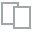
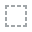
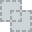
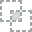
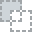
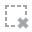
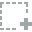
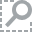
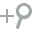
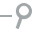
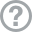
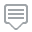
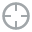
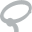
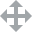
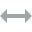
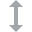
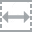
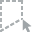
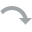
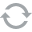
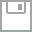
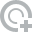
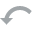
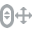
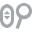
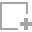
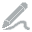
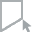
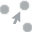
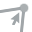
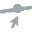

In [31]:
from dataprep.eda import create_report
create_report(data).show()

In [32]:
top_10_cost_rest = data[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

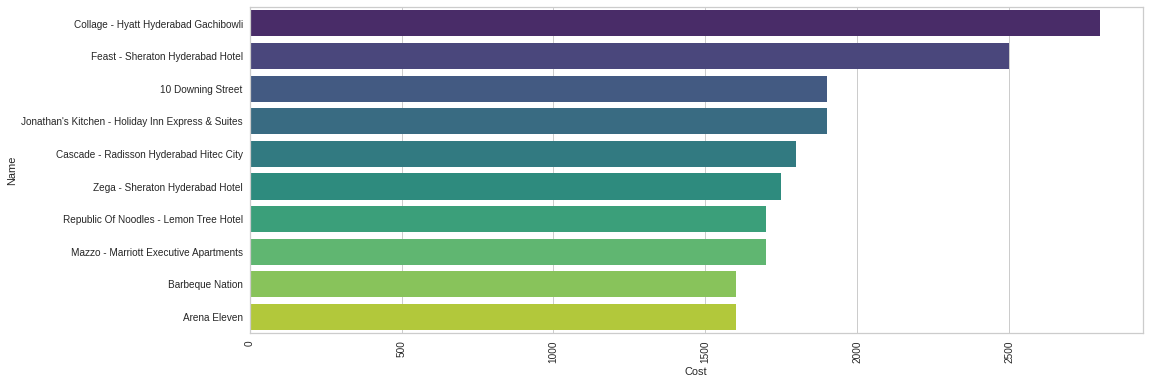

In [33]:
plt.figure(figsize=(16,6))
x = top_10_cost_rest['Cost']
y = top_10_cost_rest['Name']
plt.xticks(rotation=90)
sns.barplot(x=x,y=y,palette='viridis')
plt.show()

In [34]:
top_10_rest = data[['Cost','Name']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

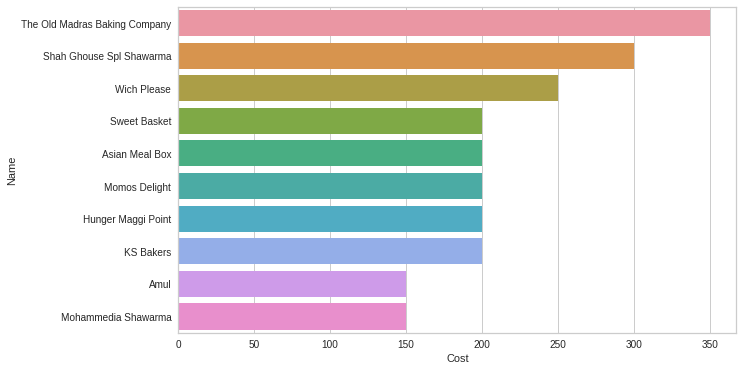

In [35]:
plt.figure(figsize=(10,6))
x = top_10_rest['Cost']
y= top_10_rest['Name']
sns.barplot(x=x,y=y)
plt.show()

#**Cuisines in Restaurants**

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(data.Cuisines)):
    cui = re.sub('[^a-zA-Z]', ' ', data.Cuisines[i])
    cui = cui.lower()
    cui = cui.split()
    
    cui = [ps.stem(word) for word in cui if not word in stopwords.words('english')]
    cui = ' '.join(cui)
    corpus.append(cui) 
    



In [38]:
word_freq = pd.DataFrame(cuisines.items(), columns=['Cuisine_Types','Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

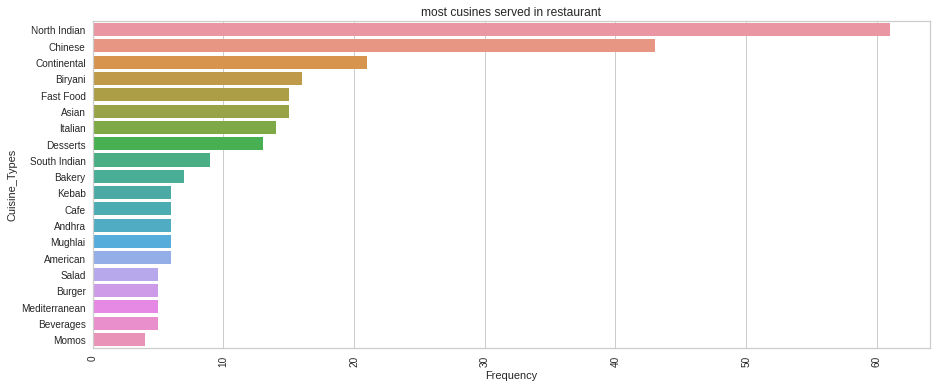

In [39]:
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Types']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant")
plt.ylabel("Cuisine Words")
plt.xlabel("Frequency")
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

#**Review**

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



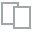
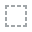
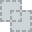
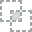
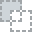
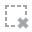
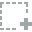
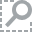
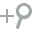
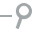
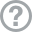
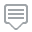
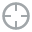
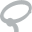
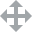
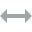
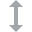
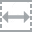
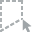
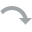
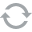
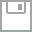
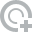
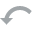
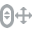
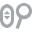
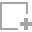
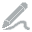
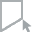
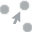
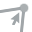
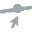

In [40]:
create_report(review).show()

In [41]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [42]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [43]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [44]:
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [45]:
#substitutiong 'like' observation first by nan values ans then by mean of the feature

review.loc[review["Rating"]=='Like'] = np.nan
review['Rating']= review['Rating'].astype('float64')

In [46]:
print(review['Rating'].mean())

3.601044071880333


In [47]:
review['Rating'].fillna(3.6, inplace=True)

In [48]:
# split metadata column into 2 columns i.e. Reviews and followers
review['Reviews'],review['Followers'] = review.Metadata.str.split(',').str


<ipython-input-48-41a2f65ee66a>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review['Reviews'],review['Followers'] = review.Metadata.str.split(',').str


In [49]:
review['Reviews'] = pd.to_numeric(review['Reviews'].str.split(' ').str[0])
          

In [50]:
review['Followers']= pd.to_numeric(review['Followers'].str.split(' ').str[1])

In [51]:
review = review.drop(['Metadata'],axis=1)

In [52]:
review.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
dtype: int64

In [53]:
# Replacing followers and reviews null values into 0
review['Followers'].fillna(0,inplace=True)
review['Reviews'].fillna(0,inplace=True)

In [54]:
# Dropping all other null values
review.dropna(inplace = True)

In [55]:
review.reset_index(inplace = True)

In [56]:
review['month'] = pd.DatetimeIndex(review['Time']).month
review['hour'] = pd.DatetimeIndex(review['Time']).hour
review['Time'] = pd.to_datetime(review['Time'])

In [57]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       9954 non-null   int64         
 1   Restaurant  9954 non-null   object        
 2   Reviewer    9954 non-null   object        
 3   Review      9954 non-null   object        
 4   Rating      9954 non-null   float64       
 5   Time        9954 non-null   datetime64[ns]
 6   Pictures    9954 non-null   float64       
 7   Reviews     9954 non-null   float64       
 8   Followers   9954 non-null   float64       
 9   month       9954 non-null   int64         
 10  hour        9954 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 855.5+ KB


In [58]:
review.head(3)

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   

                 Time  Pictures  Reviews  Followers  month  hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0      5    15  
1 2019-05-25 14:20:00       0.0      3.0        2.0      5    14  
2 2019-05-24 22:54:00       0.0      2.0        3.0      5    22

#**EDA of Review**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


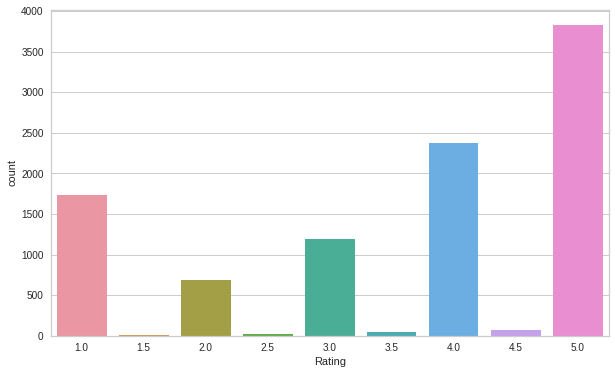

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(review['Rating'])
plt.show()

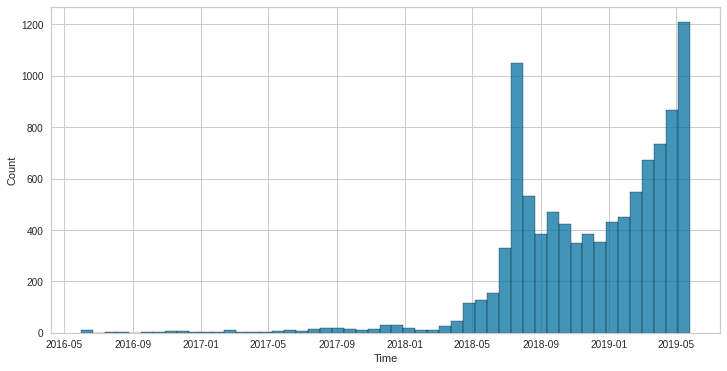

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(review.Time)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


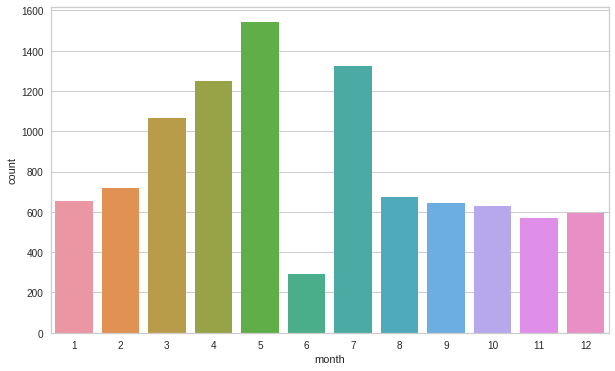

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(review.month)

In [62]:
review_hour = review[['hour']].groupby('hour').apply(lambda x: x['hour'].count()).reset_index(name='Reviews_per_hour')


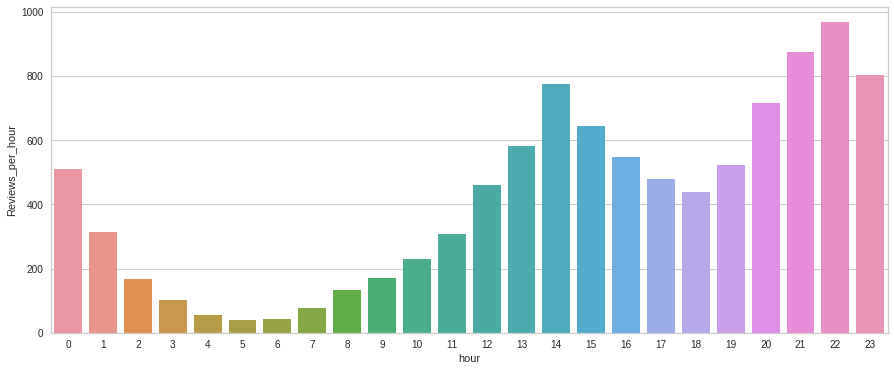

In [63]:
plt.figure(figsize=(15,6))
x = review_hour['hour']
y = review_hour['Reviews_per_hour']
sns.barplot(x=x,y=y)

**As we can se there is an increase of reviews made from the afternoon to the midnight and then in the morning there is a decrease, but I think this is normal because in during the morning the most of the people is working or is at school**

In [64]:
review_df = review['Review']
review_df

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

**Merging the Dataset**

In [65]:
df_sent = data.merge(review,left_on = 'Name',right_on = 'Restaurant')

In [66]:
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9953
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        9954 non-null   object        
 1   Cost        9954 non-null   int64         
 2   Cuisines    9954 non-null   object        
 3   index       9954 non-null   int64         
 4   Restaurant  9954 non-null   object        
 5   Reviewer    9954 non-null   object        
 6   Review      9954 non-null   object        
 7   Rating      9954 non-null   float64       
 8   Time        9954 non-null   datetime64[ns]
 9   Pictures    9954 non-null   float64       
 10  Reviews     9954 non-null   float64       
 11  Followers   9954 non-null   float64       
 12  month       9954 non-null   int64         
 13  hour        9954 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [67]:
df_sent.head(3)

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   
1  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   
2  Beyond Flavours   800  Chinese, Continental, Kebab, European, South I...   

   index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   

                 Time  Pictures  Reviews  Followers  month  hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0      5    15  
1 2019-05-25 14:20:00       0.0      3.0        2.0      5    14  
2 2019-05-24 22:54:00       0.0      2.0        3.0      5    22

In [68]:
df_sent['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [69]:
#importing libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [70]:
#defining function to remove punctuaion and stopwords
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
     

In [71]:
#removing punctuaion and stopwords
df_sent['reviews'] = df_sent['Review'].apply(text_process)

In [72]:
#dropping unecessary columns
df_sent=df_sent.drop(['Name','Cost','Cuisines','Reviewer','Time','Pictures','Followers','month','hour','Reviews'],axis=1)
df_sent.head()

index       Restaurant                                             Review  \
0      0  Beyond Flavours  The ambience was good, food was quite good . h...   
1      1  Beyond Flavours  Ambience is too good for a pleasant evening. S...   
2      2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   
3      3  Beyond Flavours  Soumen das and Arun was a great guy. Only beca...   
4      4  Beyond Flavours  Food is good.we ordered Kodi drumsticks and ba...   

   Rating                                            reviews  
0     5.0  ambience good food quite good Saturday lunch c...  
1     5.0  Ambience good pleasant evening Service prompt ...  
2     5.0  must try great food great ambience Thnx servic...  
3     5.0  Soumen das Arun great guy behavior sincerety g...  
4     5.0  Food goodwe ordered Kodi drumsticks basket mut...

In [73]:
# function to Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_letters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [74]:
#removing non letters
df_sent['reviews']=remove_non_letters(df_sent['reviews'])

In [75]:
df_sent.head(3)

index       Restaurant                                             Review  \
0      0  Beyond Flavours  The ambience was good, food was quite good . h...   
1      1  Beyond Flavours  Ambience is too good for a pleasant evening. S...   
2      2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   

   Rating                                            reviews  
0     5.0  ambience good food quite good Saturday lunch c...  
1     5.0  Ambience good pleasant evening Service prompt ...  
2     5.0  must try great food great ambience Thnx servic...

In [76]:
#importing libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
     

In [77]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity
     

In [78]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity
     

In [79]:
#Create two new columns
df_sent['Subjectivity'] = df_sent['reviews'].apply(subjectivity)
df_sent['Polarity'] = df_sent['reviews'].apply(polarity)

In [80]:
#Create a function to compute the negative, neutral and positive output
def sentiment_output(polarity_score):
    if polarity_score <0:
        return 'Negative'
    elif polarity_score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [81]:
#computting sentiment scores
df_sent['sentiment_output'] = df_sent['Polarity'].apply(sentiment_output)

In [82]:
df_sent.head(3)
     

index       Restaurant                                             Review  \
0      0  Beyond Flavours  The ambience was good, food was quite good . h...   
1      1  Beyond Flavours  Ambience is too good for a pleasant evening. S...   
2      2  Beyond Flavours  A must try.. great food great ambience. Thnx f...   

   Rating                                            reviews  Subjectivity  \
0     5.0  ambience good food quite good Saturday lunch c...      0.720000   
1     5.0  Ambience good pleasant evening Service prompt ...      0.691667   
2     5.0  must try great food great ambience Thnx servic...      0.675000   

   Polarity sentiment_output  
0  0.660000         Positive  
1  0.708333         Positive  
2  0.550000         Positive

#*Dividing the dataset into dependent and independent variables*

In [83]:
X = df_sent['reviews']
y = df_sent['sentiment_output']

In [84]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [85]:
#applying TEidfvectorizer on variables
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors

vectorizer = TfidfVectorizer()

X_train= vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

#**Logistic regression**

In [86]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [87]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [90]:
from sklearn import metrics

In [91]:
#evaluation metrics of logistic regression
print(metrics.classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

    Negative       0.89      0.76      0.82       377
     Neutral       0.97      0.35      0.51       106
    Positive       0.91      0.99      0.95      1508

    accuracy                           0.91      1991
   macro avg       0.92      0.70      0.76      1991
weighted avg       0.91      0.91      0.90      1991



Logistic regression is given us 91% accuracy Therefore logistic regression is performing well on the dataset to predict the sentiments

#**SVM**

In [92]:
# importing libraries
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

# Initialising SVM classifier with linear kernel
svm_classifier = svm.SVC(kernel='linear')

# training the model with the train data
svm_classifier.fit(X_train, y_train)
# testing the model in test data content
predicted_result = svm_classifier.predict(X_test)
     

In [93]:
#Support vector machine classifier evaluation metrics
print(metrics.classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84       377
     Neutral       0.96      0.60      0.74       106
    Positive       0.94      0.98      0.96      1508

    accuracy                           0.93      1991
   macro avg       0.92      0.80      0.85      1991
weighted avg       0.93      0.93      0.93      1991



SVM classifier is giving us 93% accuracy. Therefore SVM is performing very well on the dataset to predict the sentiments

> Indented block



#**Random Forest - Ensemble Technique**

In [94]:
#importing packges to fit random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
#fitting Random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
#getting predicted values of y train and y test
train_preds_rf =  rf.predict(X_train)
test_preds_rf  = rf.predict(X_test)
     

In [97]:
#random forest classifier evaluation metrics 
from sklearn import metrics
print(metrics.classification_report(test_preds_rf, y_test))

              precision    recall  f1-score   support

    Negative       0.65      0.91      0.76       269
     Neutral       0.77      0.86      0.82        95
    Positive       0.98      0.91      0.95      1627

    accuracy                           0.91      1991
   macro avg       0.80      0.90      0.84      1991
weighted avg       0.93      0.91      0.92      1991



Random forest classifier is given us 91% accuracy Therefore random forest classifier is performing well on the dataset to predict the sentiments 

#**Catboost - Ensemble Technique**

In [98]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
import catboost as ctb
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
print(model_CBC)

Learning rate set to 0.087959
0:	learn: 1.0044260	total: 957ms	remaining: 15m 55s
1:	learn: 0.9284561	total: 1.73s	remaining: 14m 24s
2:	learn: 0.8644833	total: 2.38s	remaining: 13m 12s
3:	learn: 0.8116745	total: 2.88s	remaining: 11m 58s
4:	learn: 0.7688525	total: 3.35s	remaining: 11m 7s
5:	learn: 0.7338458	total: 3.81s	remaining: 10m 30s
6:	learn: 0.7027367	total: 4.33s	remaining: 10m 14s
7:	learn: 0.6732431	total: 4.89s	remaining: 10m 6s
8:	learn: 0.6496184	total: 5.47s	remaining: 10m 2s
9:	learn: 0.6266751	total: 5.95s	remaining: 9m 48s
10:	learn: 0.6090414	total: 6.44s	remaining: 9m 39s
11:	learn: 0.5935030	total: 6.9s	remaining: 9m 27s
12:	learn: 0.5781714	total: 7.38s	remaining: 9m 20s
13:	learn: 0.5617607	total: 7.86s	remaining: 9m 13s
14:	learn: 0.5468214	total: 8.33s	remaining: 9m 7s
15:	learn: 0.5327130	total: 8.8s	remaining: 9m 1s
16:	learn: 0.5221779	total: 9.28s	remaining: 8m 56s
17:	learn: 0.5097994	total: 10.1s	remaining: 9m 11s
18:	learn: 0.4994858	total: 10.9s	remainin

In [100]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [101]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

    Negative       0.87      0.77      0.82       377
     Neutral       0.91      0.38      0.53       106
    Positive       0.91      0.97      0.94      1508

    accuracy                           0.90      1991
   macro avg       0.90      0.71      0.76      1991
weighted avg       0.90      0.90      0.89      1991

[[ 289    1   87]
 [   4   40   62]
 [  38    3 1467]]


Catboost is useful in reducing overfitting but it is giving an accuracy of 90%

#**Conclusion :**
*Conclusions for EDA : *

1.The most preferred cuisines in restaurants is North Indian, Chinese food, ontinental ,Biryani and fast food etc.

2.Customers spending is highest at restaurants named Collage-Hyatt Hyderabad Ghachibowli,Feast Sheraton Hyderabad hotel and 10 Downing street etc. Customers spending is lowest at restaurants named Amul ,Mohammedia shawarma and Hunger maggi point ,etc

3.The highest rated restaurants are AB’s –Absolute barbecues,B –Dubs and 3B’s-Buddies,Bar & barbecues.

4.The restaurants are busiest in the month of April ,May and July According to the reviewer count.And there are less number of customer in month of January, November and December.

5.Customers are giving highest reviews in the month of may and july but the no. is drasctically down in june.

Conclusions from clustering :

1.k means clustering is giving us 5 clusters to divide restaurants on the basis of cuisines .k means is giving silhouette score of 0.559 The north indian cuisine and chinses cuisine is present in all clusters of k means clusters. so we can say that theses two cuisines are most preferred by customers in all restaurants.

2.Hierarchical clustering is also giving us 5 clusters to divide restaurants on the basis of cuisines .hierarchical clustering is giving silhouette score of 0.553 The north Indian cuisine and Chinese cuisine is present in all clusters of hierarchical clusters. so we can say that theses two cuisines are most preferred by customers in all restaurants.

Conclusions from sentimental analysis :

I have used four machine learning models for sentimental analysis those models are SVM classifier , logistic regression ,Catboost classifier and random forest model.

1.Logistic regression and random forest model are both giving us accuracy of 91% And Catboost is giving accuracy of 90%

2.Support vector machine classifier is giving highest among all the model i.e. 93%.Therefore we can use SVM for the predictions of sentiments